In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_file = 'ex1data1.txt'
data_frame = np.genfromtxt(data_file, delimiter=',')

x_data = data_frame[:,0]
y_data = data_frame[:,1]

In [2]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2 * len(data_frame))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

step: 0, current cost: 6.93018, W: 0.618368, b: 0.685076
step: 100, current cost: 5.88381, W: 0.76768, b: -0.0615739
step: 200, current cost: 5.47944, W: 0.831137, b: -0.690255
step: 300, current cost: 5.1973, W: 0.884051, b: -1.21448
step: 400, current cost: 5.00029, W: 0.928172, b: -1.6516
step: 500, current cost: 4.86263, W: 0.964964, b: -2.01609
step: 600, current cost: 4.76634, W: 0.995641, b: -2.32002
step: 700, current cost: 4.6989, W: 1.02122, b: -2.57345
step: 800, current cost: 4.65162, W: 1.04255, b: -2.78477
step: 900, current cost: 4.61841, W: 1.06034, b: -2.96096
training cost: 4.59524, W: 1.07503, b: -3.10655


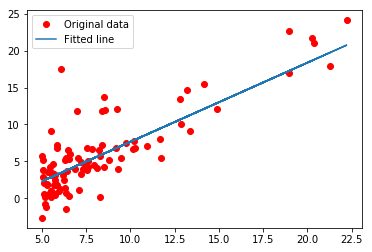

In [4]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(1000):
    for (x, y) in data_frame:
        sess.run(optimizer, feed_dict={X: x, Y: y})

    if i % 100 == 0:
        curr_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print("step: %d, current cost: %g, W: %g, b: %g"%(i, curr_cost, sess.run(W)[0], sess.run(b)[0]))

training_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
print("training cost: %g, W: %g, b: %g"%(training_cost, sess.run(W)[0], sess.run(b)[0]))

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [5]:
# https://www.cs.toronto.edu/~frossard/post/tensorflow/
from sklearn import preprocessing

data_file = 'ex1data2.txt'
data_frame = np.genfromtxt(data_file, delimiter=',')

scaled_data_frame = preprocessing.StandardScaler().fit_transform(data_frame)
x_data = scaled_data_frame[:,[0,1]]
y_data = scaled_data_frame[:,[2]]

In [6]:
X = tf.placeholder("float", [None, 2])
Y = tf.placeholder("float", [None, 1])

W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0))

pred = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_mean(tf.pow(pred - Y, 2))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [19]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for i in range(10000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})

    if i % 1000 == 0:    
        curr_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print "step:", i, ", current cost:", curr_cost, ", W:", sess.run(W).tolist(), ", b:", sess.run(b)

training_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
print "training cost:", training_cost, ", W:", sess.run(W).tolist(), ", b:", sess.run(b)

step: 0 , current cost: 1.3265 , W: [[-0.2774770259857178], [0.9470615983009338]] , b: [[-0.10049716]]
step: 1000 , current cost: 0.267055 , W: [[0.8846093416213989], [-0.053022194653749466]] , b: [[ -1.46488359e-08]]
step: 2000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1.48071155e-08]]
step: 3000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1.48814951e-08]]
step: 4000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1.49558730e-08]]
step: 5000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1.47694816e-08]]
step: 6000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1.48438613e-08]]
step: 7000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1.49182391e-08]]
step: 8000 , current cost: 0.267055 , W: [[0.884763777256012], [-0.053177475929260254]] , b: [[ -1

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#plt.plot(train_X, train_Y, 'ro', label='Original data')
#plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#plt.legend()
#plt.show()